# House price prediction

## Predicting the price of houses in Washnington DC in USA.

### Feature engineering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_frame=pd.read_csv('modified_dataset.csv')
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


- Missing values
- Categorical values
- Numerical values
- Temporal variables
- Handling outliers in continous variables
- Data validation
- Transformation
- Feature scaling
- Finding multi-collinearity

In [7]:
#categorical - data_frame[cols].fillna('Missing')

In [8]:
# Label encoding - ['s1','s3','s5','s6',s3] 
#rank = ['s1':0,'s2':1,....'s3':4]

# data_frame[cols].value_counts(ascending=True)
# 's1' 1
# 's3' 2

#rank


In [9]:
#check out the missing values.
for cols in data_frame.columns:
    print(cols,' has ',data_frame[cols].isnull().sum(),' values')

price  has  0  values
bedrooms  has  0  values
bathrooms  has  0  values
sqft_living  has  0  values
sqft_lot  has  0  values
floors  has  0  values
waterfront  has  0  values
view  has  0  values
condition  has  0  values
sqft_above  has  0  values
sqft_basement  has  0  values
yr_built  has  0  values
yr_renovated  has  0  values
street  has  0  values
city  has  0  values
statezip  has  0  values
country  has  0  values


In [10]:
#there are no null values.

In [11]:
#handling categorical features.
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)

In [12]:
categorical_features

['street', 'city', 'statezip', 'country']

In [13]:
#converting the categorical to numerical features.
for cols in categorical_features:
    #value_counts()
    rank=data_frame[cols].value_counts().index
    mapping={i:k for k,i in enumerate(rank,0)}
    data_frame[cols]=data_frame[cols].map(mapping)

In [14]:
data_frame[categorical_features]

,street,city,statezip,country
0,623,10,14,0
1,1351,0,47,0
2,4406,6,6,0
3,972,2,45,0
4,4338,3,1,0
...,...,...,...,...
4595,3123,0,14,0
4596,2866,2,54,0
4597,4337,1,5,0
4598,102,0,49,0


In [15]:
#handling numerical features
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        numerical_features.append(cols)

In [16]:
print(numerical_features)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [17]:
#handilng temporal variables.
temporal_variables=['yr_built','yr_renovated']
for cols in temporal_variables:
    new_value=2021-data_frame[cols]
    data_frame[cols]=np.where(data_frame[cols].isin([0]),0,new_value)

In [18]:
data_frame[temporal_variables]

,yr_built,yr_renovated
0,66,16
1,100,0
2,55,0
3,58,0
4,45,29
...,...,...
4595,67,42
4596,38,12
4597,12,0
4598,47,0


In [19]:
#handling outliers in continous data.
continuos_features=[]
discrete_features=[]
for cols in numerical_features:
    if len(data_frame[cols].value_counts())<25:
        discrete_features.append(cols)
    else:
        continuos_features.append(cols)

In [20]:
def outliers(cols):
    std=np.std(data_frame[cols])
    mean=np.mean(data_frame[cols])
    threshold=2
    median=data_frame[cols].median()
    outliers=[]
    for j in data_frame[cols]:
        z_score=(j-mean)/std
        if z_score>=threshold:
            outliers.append(j)
    return data_frame[cols].replace(outliers,median,inplace=True)
            

In [21]:
for cols in continuos_features:
    if 'yr' not in cols:
        outliers(cols)

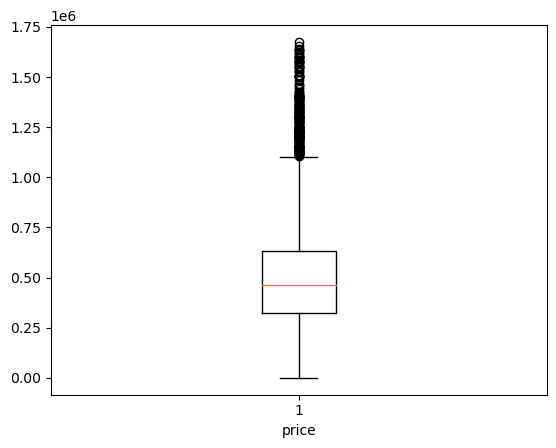

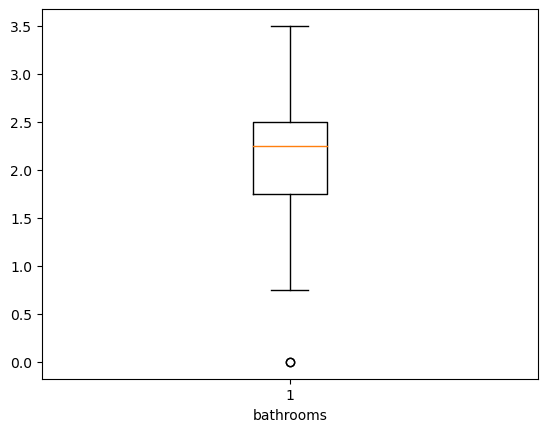

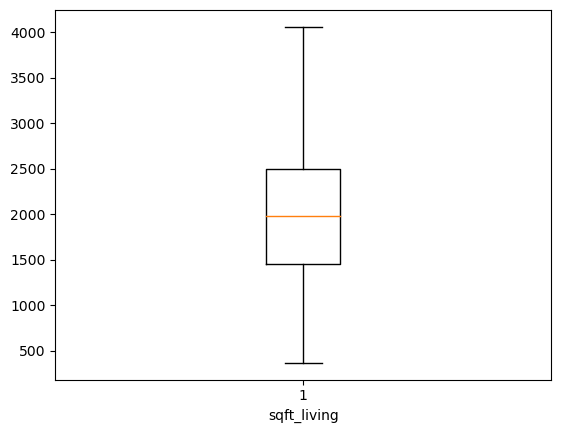

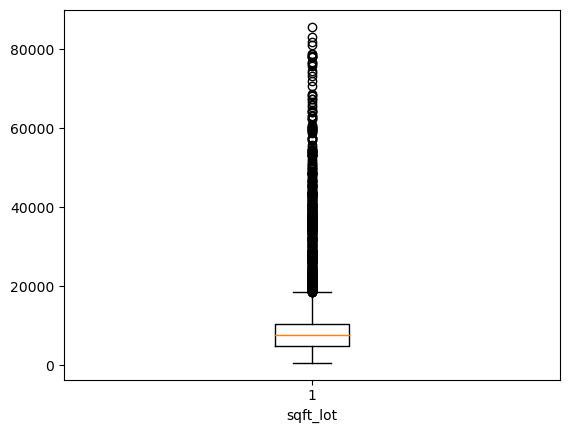

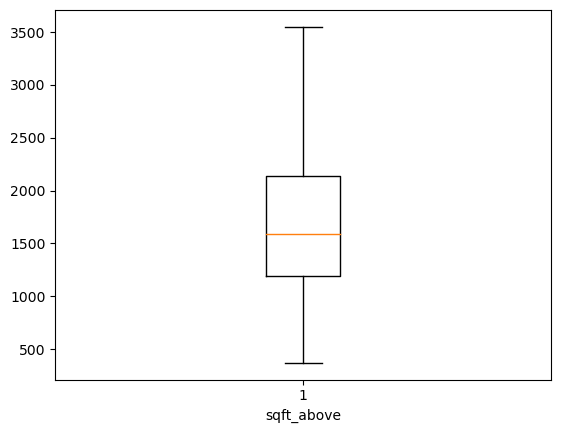

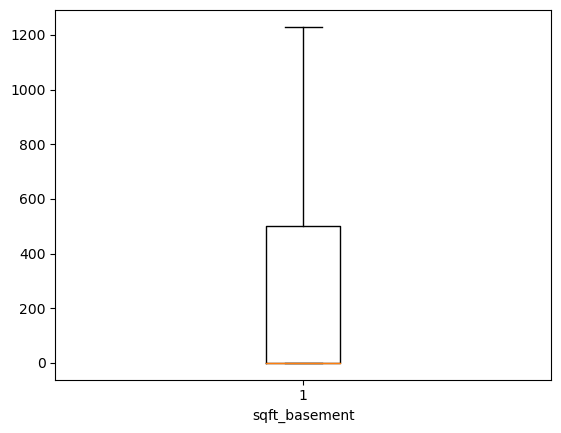

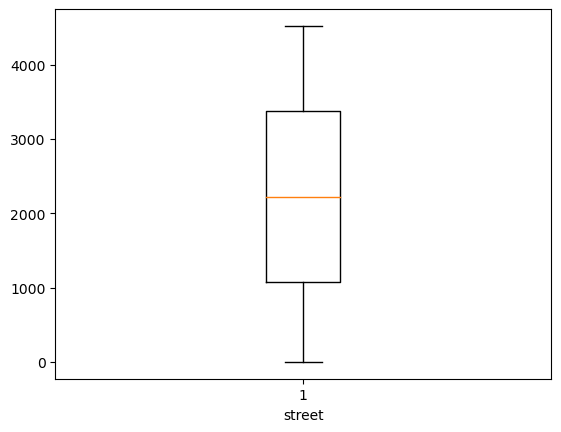

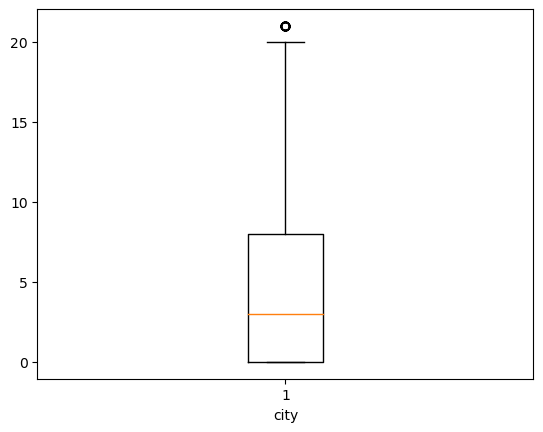

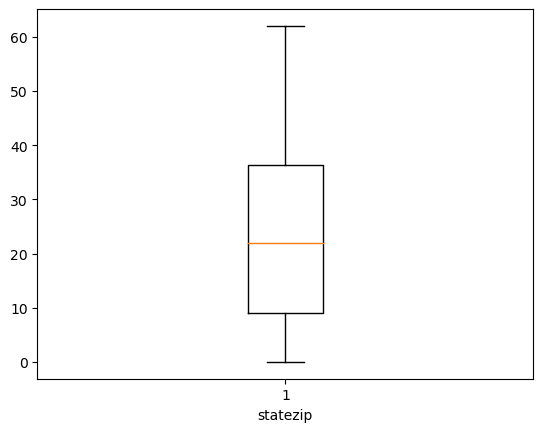

In [22]:
for cols in continuos_features:
    if 'yr' not in cols:
        plt.boxplot(data_frame[cols])
        plt.xlabel(cols)
        plt.show()

In [23]:
for cols in continuos_features:
    if 0 in data_frame[cols].unique():
        pass
    else:
        data_frame[cols]=np.log(data_frame[cols])

In [24]:
# feature scaling

In [25]:
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.000000,3.0,1.50,7.200425,8.976136,1.5,0,0,3,7.200425,0,4.189655,16,623,10,14,0
1,460943.461539,5.0,2.50,8.202482,9.110520,2.0,0,4,5,8.122668,280,4.605170,0,1351,0,47,0
2,342000.000000,3.0,2.00,7.565275,9.388235,1.0,0,0,4,7.565275,0,4.007333,0,4406,6,6,0
3,420000.000000,3.0,2.25,7.600902,8.990940,1.0,0,0,4,6.907755,1000,4.060443,0,972,2,45,0
4,550000.000000,4.0,2.50,7.570443,9.259131,1.0,0,0,4,7.038784,800,3.806662,29,4338,3,1,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()
x=data_frame.iloc[:,1:]
scaler.fit(x)

MinMaxScaler()

In [28]:
scaler.transform(x)

array([[0.33333333, 0.42857143, 0.53723927, ..., 0.47619048, 0.22580645,
        0.        ],
       [0.55555556, 0.71428571, 0.95555889, ..., 0.        , 0.75806452,
        0.        ],
       [0.33333333, 0.57142857, 0.68954996, ..., 0.28571429, 0.09677419,
        0.        ],
       ...,
       [0.33333333, 0.71428571, 0.87507786, ..., 0.04761905, 0.08064516,
        0.        ],
       [0.44444444, 0.57142857, 0.72279822, ..., 0.        , 0.79032258,
        0.        ],
       [0.33333333, 0.71428571, 0.58153456, ..., 0.9047619 , 0.09677419,
        0.        ]])

In [29]:
x_values=pd.DataFrame(x,columns=x.columns)
x_values.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,7.200425,8.976136,1.5,0,0,3,7.200425,0,4.189655,16,623,10,14,0
1,5.0,2.50,8.202482,9.110520,2.0,0,4,5,8.122668,280,4.605170,0,1351,0,47,0
2,3.0,2.00,7.565275,9.388235,1.0,0,0,4,7.565275,0,4.007333,0,4406,6,6,0
3,3.0,2.25,7.600902,8.990940,1.0,0,0,4,6.907755,1000,4.060443,0,972,2,45,0
4,4.0,2.50,7.570443,9.259131,1.0,0,0,4,7.038784,800,3.806662,29,4338,3,1,0


In [30]:
new_data_frame=pd.concat([x_values,data_frame[['price']].reset_index(drop=True)],axis=1)

In [31]:
new_data_frame.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,3.0,1.50,7.200425,8.976136,1.5,0,0,3,7.200425,0,4.189655,16,623,10,14,0,313000.000000
1,5.0,2.50,8.202482,9.110520,2.0,0,4,5,8.122668,280,4.605170,0,1351,0,47,0,460943.461539
2,3.0,2.00,7.565275,9.388235,1.0,0,0,4,7.565275,0,4.007333,0,4406,6,6,0,342000.000000
3,3.0,2.25,7.600902,8.990940,1.0,0,0,4,6.907755,1000,4.060443,0,972,2,45,0,420000.000000
4,4.0,2.50,7.570443,9.259131,1.0,0,0,4,7.038784,800,3.806662,29,4338,3,1,0,550000.000000


In [32]:
new_data_frame.to_csv('new_data.csv',index=False)